Cell này kiểm tra số records của dataset và số features

In [3]:
import pandas as pd
import numpy as np

# Đọc dataset
df = pd.read_csv('../data/raw/raw_data.csv')

print("="*80)
print("THỐNG KÊ NULL VALUES VÀ GIÁ TRỊ 0 TRONG DATASET")
print("="*80)
print(f"\nTổng số dòng: {len(df)}")
print(f"Tổng số cột: {len(df.columns)}\n")

THỐNG KÊ NULL VALUES VÀ GIÁ TRỊ 0 TRONG DATASET

Tổng số dòng: 100000
Tổng số cột: 29



Cell này kiểm tra null của các cột

In [4]:
# Kiểm tra null values trong từng cột
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

# Lọc các cột có null values
columns_with_nulls = null_counts[null_counts > 0]

print("="*80)
print("NHÓM 1: CÁC CỘT CÓ NULL VALUES")
print("="*80)

if len(columns_with_nulls) > 0:
    null_df = pd.DataFrame({
        'Cột': columns_with_nulls.index,
        'Số lượng NULL': columns_with_nulls.values,
        'Phần trăm (%)': [null_percentages[col] for col in columns_with_nulls.index]
    })
    null_df = null_df.sort_values('Số lượng NULL', ascending=False).reset_index(drop=True)
    
    print(f"\nTổng số cột có NULL: {len(columns_with_nulls)}\n")
    print(null_df.to_string(index=False))
    print(f"\n{'Cột':<30} {'NULL':>15} {'%':>10}")
    print("-"*56)
    for col in columns_with_nulls.index:
        print(f"{col:<30} {null_counts[col]:>15,} {null_percentages[col]:>9.2f}%")
else:
    print("\n✓ Không có cột nào chứa NULL values")

print("\n")

NHÓM 1: CÁC CỘT CÓ NULL VALUES

Tổng số cột có NULL: 18

                 Cột  Số lượng NULL  Phần trăm (%)
        instagram_id          97335          97.34
          twitter_id          97281          97.28
         facebook_id          95102          95.10
     collection_name          94514          94.51
       collection_id          94514          94.51
    certification_US          89874          89.87
             tagline          80411          80.41
         trailer_key          75150          75.15
            keywords          62585          62.58
production_companies          42134          42.13
production_countries          25871          25.87
             imdb_id          24287          24.29
    spoken_languages          21821          21.82
              genres          15963          15.96
           cast_top5          13698          13.70
            overview           8932           8.93
           directors           8477           8.48
        release_date     

Cell này kiểm tra giá trị 0 của các cột

In [5]:
# Kiểm tra giá trị 0 trong từng cột (chỉ cho cột số)
numeric_cols = df.select_dtypes(include=[np.number]).columns

zero_counts = {}
zero_percentages = {}

for col in numeric_cols:
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        zero_counts[col] = zero_count
        zero_percentages[col] = round((zero_count / len(df) * 100), 2)

print("="*80)
print("NHÓM 2: CÁC CỘT CÓ GIÁ TRỊ 0")
print("="*80)
print("(Chỉ kiểm tra các cột số)\n")

if len(zero_counts) > 0:
    zero_df = pd.DataFrame({
        'Cột': list(zero_counts.keys()),
        'Số lượng giá trị 0': list(zero_counts.values()),
        'Phần trăm (%)': [zero_percentages[col] for col in zero_counts.keys()]
    })
    zero_df = zero_df.sort_values('Số lượng giá trị 0', ascending=False).reset_index(drop=True)
    
    print(f"Tổng số cột có giá trị 0: {len(zero_counts)}\n")
    print(zero_df.to_string(index=False))
    print(f"\n{'Cột':<30} {'Giá trị 0':>15} {'%':>10}")
    print("-"*56)
    for col in sorted(zero_counts.keys(), key=lambda x: zero_counts[x], reverse=True):
        print(f"{col:<30} {zero_counts[col]:>15,} {zero_percentages[col]:>9.2f}%")
else:
    print("\n✓ Không có cột số nào chứa giá trị 0")

print("\n")

NHÓM 2: CÁC CỘT CÓ GIÁ TRỊ 0
(Chỉ kiểm tra các cột số)

Tổng số cột có giá trị 0: 6

         Cột  Số lượng giá trị 0  Phần trăm (%)
     revenue               94799          94.80
      budget               92433          92.43
vote_average               41473          41.47
  vote_count               41409          41.41
     runtime               13086          13.09
  popularity                 987           0.99

Cột                                  Giá trị 0          %
--------------------------------------------------------
revenue                                 94,799     94.80%
budget                                  92,433     92.43%
vote_average                            41,473     41.47%
vote_count                              41,409     41.41%
runtime                                 13,086     13.09%
popularity                                 987      0.99%




Cell này để nhận biết xem dữ liệu có bị mất cân bằng không

Columns trong file: ['budget', 'cast_top5', 'certification_US', 'collection_id', 'collection_name', 'directors', 'facebook_id', 'genres', 'id', 'imdb_id', 'instagram_id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'trailer_key', 'twitter_id', 'vote_average', 'vote_count']

=== PHÂN TÍCH IMBALANCE ===
Phân bố classes: {np.int64(0): np.int64(41409), np.int64(1): np.int64(12281), np.int64(2): np.int64(7281), np.int64(3): np.int64(4707), np.int64(4): np.int64(3287), np.int64(5): np.int64(2578), np.int64(6): np.int64(2009), np.int64(7): np.int64(1798), np.int64(8): np.int64(1476), np.int64(9): np.int64(1231), np.int64(10): np.int64(1088), np.int64(11): np.int64(928), np.int64(12): np.int64(850), np.int64(13): np.int64(752), np.int64(14): np.int64(687), np.int64(15): np.int64(620), np.int64(16): np.int64(547), np.int64(17): 

Text(0.5, 1.0, 'Class Percentage')

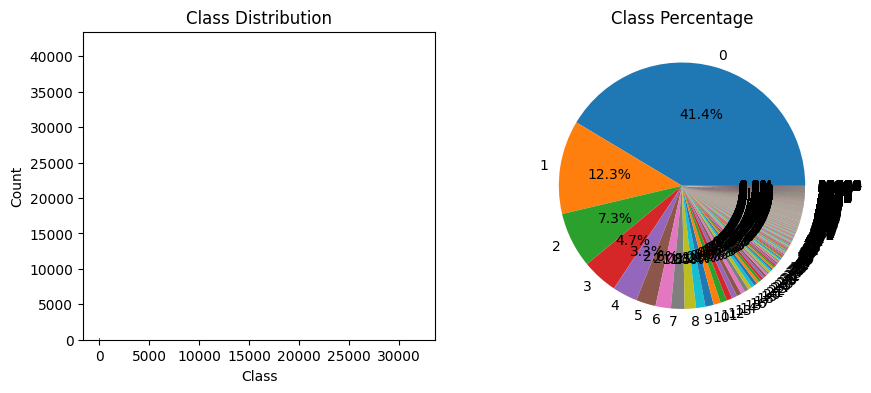

In [7]:
import pandas as pd
import numpy as np
from sklearn.utils import class_weight
import matplotlib.pyplot as plt

file_path = '../data/raw/raw_data.csv' 
target_column = 'vote_count'            

# Đọc file
df = pd.read_csv(file_path)
print("Columns trong file:", df.columns.tolist())

# Tách features và target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Kiểm tra imbalance
def analyze_imbalance(y):
    unique, counts = np.unique(y, return_counts=True)
    distribution = dict(zip(unique, counts))
    
    print("\n=== PHÂN TÍCH IMBALANCE ===")
    print("Phân bố classes:", distribution)
    
    # Tính imbalance ratio
    if len(counts) > 1:
        majority = max(counts)
        minority = min(counts)
        imbalance_ratio = majority / minority
        print(f"Imbalance ratio: {imbalance_ratio:.2f}")
        
        if imbalance_ratio > 2:
            print("CẢNH BÁO: Dữ liệu bị imbalance!")
        else:
            print("Dữ liệu khá cân bằng")
    
    # Tính weights
    weights = class_weight.compute_class_weight(
        'balanced', 
        classes=np.unique(y), 
        y=y
    )
    print("Class weights:", dict(zip(unique, weights)))
    
    return distribution

# Chạy phân tích
distribution = analyze_imbalance(y)

# Visualize
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(distribution.keys(), distribution.values())
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(distribution.values(), labels=distribution.keys(), autopct='%1.1f%%')
plt.title('Class Percentage')

#plt.tight_layout()
#plt.show()

Nhận thấy dữ liệu bị mất cân bằng liền áp dụng Stratified Cross-Validation như trong slide của cô thảo về ModelEvaluation-P2-page15

Cell này để xóa các dòng có output target = 0, vì nó không có giá trị huấn luyện đối với bài toán supervised learning

In [ ]:
# Xóa các records có vote_average = 0 và lưu file mới
print("="*80)
print("XÓA CÁC RECORDS CÓ vote_average = 0")
print("="*80)

# Đọc lại file gốc
df_original = pd.read_csv('preprocessed_data_v1.csv')
print(f"\nSố dòng ban đầu: {len(df_original):,}")

# Đếm số records có vote_average = 0
records_with_zero = (df_original['vote_average'] == 0).sum()
print(f"Số records có vote_average = 0: {records_with_zero:,} ({records_with_zero/len(df_original)*100:.2f}%)")

# Xóa các records có vote_average = 0
df_cleaned = df_original[df_original['vote_average'] != 0]
print(f"Số dòng sau khi xóa: {len(df_cleaned):,}")
print(f"Số dòng đã xóa: {len(df_original) - len(df_cleaned):,}")

# Lưu file mới
df_cleaned.to_csv('preprocessed_data_v2.csv', index=False)
print(f"\nĐã lưu file mới: preprocessed_data_v2.csv")
print("="*80)

Mục đích chính của cell này là để thống kê số lượng budget != 0 trong dataset, theo như tham khảo từ bài báo
ArXiv:2405.11651
Nhận thấy bài báo này có chủ đề và bài toán tương đồng (cùng là dự đoán phim), ở bài báo này là dự đoán doanh thu, nhận thấy paper này đáng để tham khảo ở Hình số 4 chọn ra K best features, hình features score, nhận thấy budget có điểm rất cao nên mình đã cân nhắc lọc ra các records có budget != 0

In [ ]:
# Thống kê số lượng phim có budget theo năm và số phim có budget = 0
import pandas as pd

# Đọc dataset
df = pd.read_csv('preprocessed_data_v2.csv')

# Chuyển release_date sang datetime và lấy năm
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Loại bỏ các dòng không có năm hợp lệ
df_with_year = df.dropna(subset=['year'])
df_with_year['year'] = df_with_year['year'].astype(int)

print("="*80)
print("THỐNG KÊ BUDGET THEO NĂM")
print("="*80)

# Tạo bảng thống kê
year_stats = df_with_year.groupby('year').agg({
    'budget': [
        ('Tổng số phim', 'count'),
        ('Phim có budget = 0', lambda x: (x == 0).sum()),
        ('Phim có budget > 0', lambda x: (x > 0).sum())
    ]
}).reset_index()

# Làm phẳng MultiIndex columns
year_stats.columns = ['Năm', 'Tổng số phim', 'Phim có budget = 0', 'Phim có budget > 0']

# Tính phần trăm phim có budget = 0
year_stats['% budget = 0'] = (year_stats['Phim có budget = 0'] / year_stats['Tổng số phim'] * 100).round(2)

# Sắp xếp theo năm
year_stats = year_stats.sort_values('Năm')

print(f"\nKhoảng thời gian: {year_stats['Năm'].min()} - {year_stats['Năm'].max()}")
print(f"Tổng số năm: {len(year_stats)}\n")

# Hiển thị bảng
print(year_stats.to_string(index=False))

print("\n" + "="*80)
print("TỔNG KẾT")
print("="*80)
print(f"Tổng số phim: {year_stats['Tổng số phim'].sum():,}")
print(f"Tổng phim có budget = 0: {year_stats['Phim có budget = 0'].sum():,} ({year_stats['Phim có budget = 0'].sum() / year_stats['Tổng số phim'].sum() * 100:.2f}%)")
print(f"Tổng phim có budget > 0: {year_stats['Phim có budget > 0'].sum():,} ({year_stats['Phim có budget > 0'].sum() / year_stats['Tổng số phim'].sum() * 100:.2f}%)")
print("="*80)

Kết quả là chỉ có khoảng 6k records có budget, vậy thì cần tìm cách để lấy thêm 4k records nữa để hoàn thành 10k records theo yêu cầu bài toán

Vấn đề là cách lấy 4k còn lại từ dataset kia
Logic của mình là phim rác thường ít người quan tâm, ngược lại phim có vote_count, popularity cao là phim được nhiều người quan tâm, dữ liệu chất lượng hơn phim rác nên tôi lần lượt làm các bước như sau:
Đầu tiên mình chuẩn hóa 2 giá trị khác nhau là vote_count, popularity.
Sau đó cộng 2 giá trị này lại thành quality_score vì giả định ban đầu 2 giá trị có giá trị như nhau nên trọng số của nó là 1.
Và thêm 1 cách dùng khoảng tin cậy sau đó so sánh 2 cách bằng KS test

In [ ]:
# =============================================================================
# GIAI ĐOẠN 1: LỰA CHỌN DỮ LIỆU - Phương pháp Điểm chất lượng (Quality Score)
# =============================================================================
# Lựa chọn các bản ghi chất lượng cao bằng cách sử dụng: quality_score = normalized(vote_count) + normalized(popularity)

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def filter_gold_dataset(df, target_size=10000, random_state=42):
    """
    Lọc tập dữ liệu theo target_size bằng phương pháp lựa chọn theo Điểm chất lượng (Quality Score).

    Chiến lược:
    1. Giữ lại TẤT CẢ các bản ghi có budget > 0 (Gold Set - dữ liệu có độ tin cậy cao)
    2. Chọn các bản ghi còn lại từ nhóm budget = 0 (Silver Set) bằng cách sử dụng quality_score
    3. quality_score = normalized_vote_count + normalized_popularity

    Tham số:
    -----------
    df : DataFrame
        Tập dữ liệu đầu vào
    target_size : int
        Số lượng bản ghi mục tiêu (mặc định: 10000)
    random_state : int
        Số ngẫu nhiên (seed) để đảm bảo khả năng tái lập kết quả

    Trả về:
    --------
    DataFrame : Tập dữ liệu đã được lọc với kích thước target_size
    """

    print("="*80)
    print("PHASE 1: DATA SELECTION (Quality Score Method)")
    print("="*80)
    
    # Split into Gold (budget > 0) and Silver (budget = 0)
    df_gold = df[df['budget'] > 0].copy()
    df_silver = df[df['budget'] == 0].copy()
    
    print(f"\nDataset Split:")
    print(f"   Gold (budget > 0):   {len(df_gold):,} records")
    print(f"   Silver (budget = 0): {len(df_silver):,} records")
    
    # Tính toán số lượng bản ghi Silver cần thiết
    n_silver_needed = target_size - len(df_gold)
    
    if n_silver_needed <= 0:
        print(f"\Gold set already has {len(df_gold):,} records (≥ {target_size:,})")
        print(f"   Returning top {target_size:,} Gold records by quality_score")
        
        # Áp dụng điểm chất lượng cho Gold và trả về N bản ghi đứng đầu
        vote_norm = (df_gold['vote_count'] - df_gold['vote_count'].min()) / \
                    (df_gold['vote_count'].max() - df_gold['vote_count'].min() + 1e-10)
        pop_norm = (df_gold['popularity'] - df_gold['popularity'].min()) / \
                   (df_gold['popularity'].max() - df_gold['popularity'].min() + 1e-10)
        df_gold['quality_score'] = vote_norm + pop_norm
        return df_gold.nlargest(target_size, 'quality_score').drop(columns=['quality_score'])
    
    print(f"\nNeed to select {n_silver_needed:,} records from Silver set")
    
    # --- Lựa chọn theo Điểm chất lượng cho bộ Bạc (Silver Set) ---
    print("\n" + "-"*60)
    print("Quality Score Selection")
    print("-"*60)
    
    # Min-Max normalization
    vote_norm = (df_silver['vote_count'] - df_silver['vote_count'].min()) / \
                (df_silver['vote_count'].max() - df_silver['vote_count'].min() + 1e-10)
    pop_norm = (df_silver['popularity'] - df_silver['popularity'].min()) / \
               (df_silver['popularity'].max() - df_silver['popularity'].min() + 1e-10)
    
    # quality_score = vote_count + popularity (equal weights)
    df_silver['quality_score'] = vote_norm + pop_norm
    
    # Select top N by quality_score
    silver_selected = df_silver.nlargest(n_silver_needed, 'quality_score').drop(columns=['quality_score'])
    
    print(f"   Selected: {len(silver_selected):,} records")
    print(f"   vote_average: mean={silver_selected['vote_average'].mean():.3f}, std={silver_selected['vote_average'].std():.3f}")
    
    # --- Combine and Finalize ---
    print("\n" + "="*60)
    print("FINALIZING DATASET")
    print("="*60)
    
    # Combine Gold + Selected Silver
    final_df = pd.concat([df_gold, silver_selected], ignore_index=True)
    
    # Shuffle
    final_df = final_df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    
    # Final stats
    budget_positive = (final_df['budget'] > 0).sum()
    budget_zero = (final_df['budget'] == 0).sum()
    
    print(f"\nFinal Dataset: {len(final_df):,} records")
    print(f"   From Gold (budget > 0): {budget_positive:,} ({budget_positive/len(final_df)*100:.1f}%)")
    print(f"   From Silver (budget = 0): {budget_zero:,} ({budget_zero/len(final_df)*100:.1f}%)")
    print(f"   vote_average: mean={final_df['vote_average'].mean():.3f}, std={final_df['vote_average'].std():.3f}")
    
    print("\n" + "="*80)
    
    return final_df

In [ ]:
# =============================================================================
# PHASE 1 EXECUTION: Create 10k Dataset
# =============================================================================

# Read the dataset (after removing vote_average = 0 records)
df_input = pd.read_csv('preprocessed_data_v2.csv')

print(f"Loaded: {len(df_input):,} records from preprocessed_data_v2.csv\n")

# Apply the filter function
df_10k = filter_gold_dataset(df_input, target_size=10000, random_state=42)
df_10k.to_csv("data_da_resize.csv", index=False)

print(f"\nPHASE 1 COMPLETE!")
print(f"Dataset size: {len(df_10k):,} records")
print(f"Ready for Phase 2 (Train/Test Split)")

## Giai đoạn 2: Stratified Train/Test Split (Chia tập Huấn luyện/Kiểm thử phân tầng)

**Tại sao phải chia tách TRƯỚC KHI xử lý dữ liệu thiếu (imputation)?**

Rò rỉ dữ liệu (Data leakage) xảy ra khi thông tin từ tập test ảnh hưởng đến quá trình huấn luyện. Nếu chúng ta tính toán các giá trị median/mean trên toàn bộ tập dữ liệu trước khi chia, dữ liệu của tập test sẽ bị "rò rỉ" vào các giá trị imputation được sử dụng để huấn luyện.

**Chiến lược phân tầng (Stratification Strategy):**
- Tạo các nhóm (bins) từ `vote_average` (biến mục tiêu liên tục)
- Sử dụng `StratifiedShuffleSplit` để duy trì phân phối dữ liệu
- Tỷ lệ 80% Train / 20% Test

**Kết quả mong đợi (Expected Output):**
- `X_train`: 8,000 mẫu (chỉ bao gồm features)
- `X_test`: 2,000 mẫu (chỉ bao gồm features)
- `y_train`: 8,000 giá trị mục tiêu
- `y_test`: 2,000 giá trị mục tiêu

In [ ]:
# =============================================================================
# GIAI ĐOẠN 2: STRATIFIED TRAIN/TEST SPLIT (TRƯỚC KHI XỬ LÝ IMPUTATION!)
# =============================================================================
# QUAN TRỌNG: Chia dữ liệu TRƯỚC KHI imputation để ngăn chặn rò rỉ dữ liệu (data leakage).
# Chúng ta sử dụng StratifiedShuffleSplit dựa trên các nhóm (bins) của vote_average.

from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import ks_2samp

# Cấu hình - Chỉnh sửa tại đây
INPUT_FILE = "preprocessed_data_v5_10k.csv"      # Thay đổi tên file input tại đây
TEST_SIZE = 0.2                      # Tỷ lệ test set (20%)
N_BINS = 10                          # Số bins để stratify
TARGET_COL = 'vote_average'          # Tên cột target
RANDOM_STATE = 42                    # Seed cho reproducibility

print("="*80)
print("PHASE 2: STRATIFIED TRAIN/TEST SPLIT")
print("="*80)

# Tải dữ liệu từ file CSV
print(f"\nLoading data from: {INPUT_FILE}")
df_input = pd.read_csv(INPUT_FILE)
print(f"   Loaded: {len(df_input):,} records × {df_input.shape[1]} columns")

print(f"\nConfiguration:")
print(f"   Input file: {INPUT_FILE}")
print(f"   Test size: {TEST_SIZE * 100:.0f}%")
print(f"   Stratification bins: {N_BINS}")
print(f"   Random state: {RANDOM_STATE}")

# Tạo các nhóm phân tầng (Stratification Bins)
print("\n" + "-"*60)
print("Creating Stratification Bins from vote_average")
print("-"*60)

# Tạo các nhóm (bins) tạm thời để phân tầng
df_input['_vote_bins'] = pd.cut(
    df_input[TARGET_COL], 
    bins=N_BINS, 
    labels=False,
    include_lowest=True
)

# Xử lý các giá trị NaN (không nên xảy ra, nhưng để đảm bảo an toàn)
df_input['_vote_bins'] = df_input['_vote_bins'].fillna(N_BINS // 2).astype(int)

print(f"\n   Bin distribution:")
for bin_idx, count in df_input['_vote_bins'].value_counts().sort_index().items():
    print(f"      Bin {bin_idx}: {count:,} records ({count/len(df_input)*100:.1f}%)")

# Thực hiện Stratified Split
print("\n" + "-"*60)
print("Splitting Data (80% Train / 20% Test)")
print("-"*60)

# Tách các đặc trưng (features) và biến mục tiêu (target)
X = df_input.drop(columns=[TARGET_COL])
y = df_input[TARGET_COL]
stratify_col = df_input['_vote_bins']

# Stratified Shuffle Split (Chia dữ liệu phân tầng ngẫu nhiên)
sss = StratifiedShuffleSplit(n_splits=1, test_size=TEST_SIZE, random_state=RANDOM_STATE)

for train_idx, test_idx in sss.split(X, stratify_col):
    X_train = X.iloc[train_idx].copy()
    X_test = X.iloc[test_idx].copy()
    y_train = y.iloc[train_idx].copy()
    y_test = y.iloc[test_idx].copy()

# Xóa cột nhóm (bin) tạm thời
X_train = X_train.drop(columns=['_vote_bins'], errors='ignore')
X_test = X_test.drop(columns=['_vote_bins'], errors='ignore')

print(f"\nSplit Complete:")
print(f"   X_train: {len(X_train):,} samples")
print(f"   X_test:  {len(X_test):,} samples")
print(f"   y_train: {len(y_train):,} values")
print(f"   y_test:  {len(y_test):,} values")

# Kiểm tra chất lượng phân tầng
print("\n" + "-"*60)
print("Verifying Stratification Quality")
print("-"*60)

print(f"\n   {'Set':<10} {'Mean':>10} {'Std':>10} {'Min':>8} {'Max':>8}")
print(f"   {'-'*46}")
print(f"   {'Full':<10} {y.mean():>10.4f} {y.std():>10.4f} {y.min():>8.2f} {y.max():>8.2f}")
print(f"   {'Train':<10} {y_train.mean():>10.4f} {y_train.std():>10.4f} {y_train.min():>8.2f} {y_train.max():>8.2f}")
print(f"   {'Test':<10} {y_test.mean():>10.4f} {y_test.std():>10.4f} {y_test.min():>8.2f} {y_test.max():>8.2f}")

# KS Test giữa tập train và tập test
ks_stat, ks_pval = ks_2samp(y_train, y_test)
print(f"\n   KS Test (Train vs Test): stat={ks_stat:.4f}, p={ks_pval:.4f}")
if ks_pval > 0.05:
    print(f"Distributions are statistically similar")
else:
    print(f"Some distribution difference detected")

# Kiểm tra các giá trị thiếu (Missing Values) TRƯỚC KHI xử lý Imputation
print("\n" + "-"*60)
print("Missing Values Status (BEFORE Imputation)")
print("-"*60)

print(f"\nNO IMPUTATION HAS BEEN APPLIED YET!")
print(f"   The following values need imputation:\n")

# Kiểm tra budget (0 = missing)
train_budget_missing = (X_train['budget'] == 0).sum()
test_budget_missing = (X_test['budget'] == 0).sum()

# Kiểm tra runtime (0 hoặc NaN = missing)
train_runtime_missing = ((X_train['runtime'] == 0) | X_train['runtime'].isna()).sum()
test_runtime_missing = ((X_test['runtime'] == 0) | X_test['runtime'].isna()).sum()

print(f"   {'Column':<12} {'Train Missing':>15} {'Test Missing':>15}")
print(f"   {'-'*42}")
print(f"   {'budget':<12} {train_budget_missing:>15,} {test_budget_missing:>15,}")
print(f"   {'runtime':<12} {train_runtime_missing:>15,} {test_runtime_missing:>15,}")

print("\n" + "="*80)
print("PHASE 2 COMPLETE")
print("="*80)
print("\nNEXT: Phase 3 will apply LEAKAGE-FREE imputation")
print("   (Fitting ONLY on X_train, transforming both sets)")

## Giai đoạn 3: Leakage-Free Cleaning & Imputation (Làm sạch & Xử lý giá trị thiếu không gây rò rỉ)

**Vấn đề nguyên bản (Data Leakage):**
```python
# CODE CŨ - LEAKAGE!
runtime_median = df['runtime'].median()  # ← Được tính toán trên TOÀN BỘ dataset
df['runtime'] = df['runtime'].fillna(runtime_median)
```

**Cách khắc phục:**
```python
# CODE MỚI - KHÔNG LEAKAGE
runtime_median = X_train['runtime'].median()  # ← Chỉ được tính toán trên tập TRAIN
X_train['runtime'] = X_train['runtime'].fillna(runtime_median)
X_test['runtime'] = X_test['runtime'].fillna(runtime_median)  # ← Sử dụng median của tập TRAIN
```

Ô lệnh này so sánh hai phương pháp imputation:
1. **Simple Median** (nhanh, dùng làm baseline)
2. **IterativeImputer với RandomForest** (dựa trên mô hình, giúp nắm bắt các mối quan hệ giữa các biến)

In [ ]:
# =============================================================================
# GIAI ĐOẠN 3: LEAKAGE-FREE CLEANING & IMPUTATION (LÀM SẠCH & XỬ LÝ GIÁ TRỊ THIẾU KHÔNG GÂY RÒ RỈ)
# =============================================================================
# Phiên bản tái cấu trúc này chỉ thực hiện Fit (khớp dữ liệu) trên X_train và Transform (biến đổi) trên cả hai tập dữ liệu.
# Các giá trị cần điền ban đầu được giữ nguyên: 'NR', -1, '', 'Unknown', v.v.

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import zscore

print("="*80)
print("PHASE 3: LEAKAGE-FREE CLEANING & IMPUTATION")
print("="*80)

# =============================================================================
# BƯỚC 1: Categorical Imputation (Điền dữ liệu phân loại - Giá trị tĩnh - Không rủi ro rò rỉ)
# =============================================================================
# Các bước này sử dụng giá trị cố định, vì vậy có thể áp dụng an toàn mà không cần bước fitting.

print("\n" + "-"*60)
print("STEP 1: Categorical Imputation (Static Values)")
print("-"*60)

# Logic điền giá trị gốc được giữ nguyên chính xác:
CATEGORICAL_FILLS = {
    'genres': 'Unknown',
    'keywords': 'Unknown', 
    'cast_top5': 'Unknown',
    'directors': 'Unknown',
    'production_companies': 'Unknown',
    'production_countries': 'Unknown',
    'spoken_languages': 'Unknown',
    'original_language': 'Unknown',
    'collection_id': -1,          # Phim lẻ (standalone film)
    'certification_US': 'NR',     # Chưa phân loại (Not Rated)
    'tagline': '',                # Không có slogan
    'overview': ''                # Không có mô tả
}

for col, fill_value in CATEGORICAL_FILLS.items():
    if col in X_train.columns:
        train_missing = X_train[col].isna().sum()
        test_missing = X_test[col].isna().sum()
        
        X_train[col] = X_train[col].fillna(fill_value)
        X_test[col] = X_test[col].fillna(fill_value)
        
        if train_missing > 0 or test_missing > 0:
            print(f"   {col}: filled {train_missing + test_missing} NaN with '{fill_value}'")

print("\n   Categorical imputation complete (no leakage - static values)")

# =============================================================================
# BƯỚC 2: Numerical Imputation (LÀM SẠCH KHÔNG RÒ RỈ - Fit trên Train)
# =============================================================================

print("\n" + "-"*60)
print("STEP 2: Numerical Imputation (Fit on TRAIN only)")
print("-"*60)

# Các cột cần điền giá trị số (0 = thiếu)
NUMERIC_IMPUTE_COLS = ['runtime', 'budget']

# Chuyển 0 thành NaN cho các cột này (0 nghĩa là dữ liệu thiếu)
print("\n   Converting 0 → NaN for imputation...")
for col in NUMERIC_IMPUTE_COLS:
    train_zeros = (X_train[col] == 0).sum()
    test_zeros = (X_test[col] == 0).sum()
    
    X_train.loc[X_train[col] == 0, col] = np.nan
    X_test.loc[X_test[col] == 0, col] = np.nan
    
    print(f"      {col}: Train {train_zeros} zeros → NaN, Test {test_zeros} zeros → NaN")

# Lưu phân phối tham chiếu (giá trị hợp lệ không thiếu trong TRAIN)
train_runtime_valid = X_train[X_train['runtime'].notna()]['runtime']
train_budget_valid = X_train[X_train['budget'].notna()]['budget']

print(f"\n   Reference (valid values in TRAIN):")
print(f"      runtime: n={len(train_runtime_valid):,}, median={train_runtime_valid.median():.1f}")
print(f"      budget:  n={len(train_budget_valid):,}, median={train_budget_valid.median():,.0f}")

# PHƯƠNG PHÁP A: Điền giá trị trung vị đơn giản (Simple Median Imputation)
print("\n" + "-"*60)
print("METHOD A: Simple Median Imputation")
print("-"*60)

# QUAN TRỌNG: Chỉ Fit median trên tập TRAIN!
print("\n   # Fitting median on Train only (LEAKAGE PREVENTION)")

# Calculate medians from TRAIN set only
runtime_median_train = X_train['runtime'].median()
budget_median_train = X_train['budget'].median()

print(f"   runtime_median (from train): {runtime_median_train:.1f}")
print(f"   budget_median (from train):  {budget_median_train:,.0f}")

# Apply to both sets
X_train_median = X_train.copy()
X_test_median = X_test.copy()

X_train_median['runtime'] = X_train_median['runtime'].fillna(runtime_median_train)
X_train_median['budget'] = X_train_median['budget'].fillna(budget_median_train)

# IMPORTANT: Use TRAIN median for TEST set too!
X_test_median['runtime'] = X_test_median['runtime'].fillna(runtime_median_train)
X_test_median['budget'] = X_test_median['budget'].fillna(budget_median_train)

print(f"\n    Method A complete")
print(f"      Train runtime: mean={X_train_median['runtime'].mean():.1f}, std={X_train_median['runtime'].std():.1f}")
print(f"      Train budget:  mean={X_train_median['budget'].mean():,.0f}, std={X_train_median['budget'].std():,.0f}")

# -----------------------------------------------------------------------------
# PHƯƠNG PHÁP B: IterativeImputer (Dựa trên Mô hình RandomForest)
# -----------------------------------------------------------------------------

print("\n" + "-"*60)
print("METHOD B: IterativeImputer (RandomForest)")
print("-"*60)

# Các cột sử dụng cho phương pháp điền giá trị dựa trên mô hình
ITER_FEATURES = ['runtime', 'budget', 'popularity', 'vote_count', 'revenue']
iter_features_available = [f for f in ITER_FEATURES if f in X_train.columns]

print(f"\n   Features for imputation: {iter_features_available}")

# Chuẩn bị dữ liệu
X_train_iter_input = X_train[iter_features_available].copy()
X_test_iter_input = X_test[iter_features_available].copy()

# Khởi tạo IterativeImputer
print(f"\n   # Fitting IterativeImputer on Train only (LEAKAGE PREVENTION)")

iter_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1),
    max_iter=10,
    random_state=42,
    verbose=0
)

# CHỈ FIT TRÊN TẬP TRAIN!
iter_imputer.fit(X_train_iter_input)

# Biến đổi cả hai tập dữ liệu bằng imputer đã được fit trên tập train
X_train_iter_output = pd.DataFrame(
    iter_imputer.transform(X_train_iter_input),
    columns=iter_features_available,
    index=X_train_iter_input.index
)

X_test_iter_output = pd.DataFrame(
    iter_imputer.transform(X_test_iter_input),
    columns=iter_features_available,
    index=X_test_iter_input.index
)

# Tạo bản sao đầy đủ với các giá trị đã được điền
X_train_iter = X_train.copy()
X_test_iter = X_test.copy()

for col in NUMERIC_IMPUTE_COLS:
    X_train_iter[col] = X_train_iter_output[col]
    X_test_iter[col] = X_test_iter_output[col]

print(f"\n    Method B complete")
print(f"      Train runtime: mean={X_train_iter['runtime'].mean():.1f}, std={X_train_iter['runtime'].std():.1f}")
print(f"      Train budget:  mean={X_train_iter['budget'].mean():,.0f}, std={X_train_iter['budget'].std():,.0f}")

# =============================================================================
# BƯỚC 3: So sánh các phương pháp (Phân tích Z-Score & Phương sai)
# =============================================================================

print("\n" + "="*60)
print("STEP 3: Comparing Imputation Methods")
print("="*60)

def evaluate_imputation(original_valid, imputed_all, col_name, method_name):
    """So sánh phân phối sau khi được điền giá trị (imputed distribution) với các giá trị hợp lệ ban đầu."""
    orig_mean = original_valid.mean()
    orig_std = original_valid.std()
    orig_var = original_valid.var()
    
    imp_mean = imputed_all.mean()
    imp_std = imputed_all.std()
    imp_var = imputed_all.var()
    
    # Tỷ lệ phương sai (1.0 = khớp hoàn hảo)
    var_ratio = imp_var / orig_var if orig_var > 0 else 0
    
    # Phần trăm sai lệch trung bình (Mean percentage difference)
    mean_diff_pct = abs(imp_mean - orig_mean) / orig_mean * 100 if orig_mean != 0 else 0
    
    return {
        'method': method_name,
        'column': col_name,
        'mean_diff_pct': mean_diff_pct,
        'var_ratio': var_ratio,
        'imp_std': imp_std,
        'orig_std': orig_std
    }

results = []

# Đánh giá Phương pháp A
results.append(evaluate_imputation(train_runtime_valid, X_train_median['runtime'], 'runtime', 'Median'))
results.append(evaluate_imputation(train_budget_valid, X_train_median['budget'], 'budget', 'Median'))

# Đánh giá Phương pháp B
results.append(evaluate_imputation(train_runtime_valid, X_train_iter['runtime'], 'runtime', 'Iterative (RF)'))
results.append(evaluate_imputation(train_budget_valid, X_train_iter['budget'], 'budget', 'Iterative (RF)'))

print(f"\n Imputation Quality Comparison:")
print(f"   (Variance Ratio: closer to 1.0 = better distribution preservation)")
print(f"\n   {'Method':<15} {'Column':<10} {'Mean Diff %':>12} {'Var Ratio':>12}")
print(f"   {'-'*50}")

for r in results:
    print(f"   {r['method']:<15} {r['column']:<10} {r['mean_diff_pct']:>11.2f}% {r['var_ratio']:>12.4f}")

# Z-Score Analysis
print(f"\n Z-Score Analysis (outliers with |z| > 3):")

for col in NUMERIC_IMPUTE_COLS:
    z_median = zscore(X_train_median[col].dropna())
    z_iter = zscore(X_train_iter[col].dropna())
    
    outliers_median = (np.abs(z_median) > 3).sum()
    outliers_iter = (np.abs(z_iter) > 3).sum()
    
    print(f"   {col}:")
    print(f"      Median method: {outliers_median} outliers")
    print(f"      Iterative method: {outliers_iter} outliers")

# =============================================================================
# BƯỚC 4: Chọn Phương pháp Tốt nhất
# =============================================================================

print("\n" + "-"*60)
print("DECISION: Selecting Best Imputation Method")
print("-"*60)

# Calculate average variance ratio distance from 1.0
median_results = [r for r in results if r['method'] == 'Median']
iter_results = [r for r in results if r['method'] == 'Iterative (RF)']

median_var_dist = np.mean([abs(1.0 - r['var_ratio']) for r in median_results])
iter_var_dist = np.mean([abs(1.0 - r['var_ratio']) for r in iter_results])

print(f"\n   Average distance from perfect variance ratio (1.0):")
print(f"      Median method:    {median_var_dist:.4f}")
print(f"      Iterative method: {iter_var_dist:.4f}")

if iter_var_dist < median_var_dist:
    BEST_METHOD = "Iterative"
    X_train_final = X_train_iter.copy()
    X_test_final = X_test_iter.copy()
    print(f"\n   SELECTED: Iterative (RandomForest) - better variance preservation")
else:
    BEST_METHOD = "Median"
    X_train_final = X_train_median.copy()
    X_test_final = X_test_median.copy()
    print(f"\n   SELECTED: Median - simpler and sufficient")

# =============================================================================
# BƯỚC 5: Làm sạch lần cuối (Các giá trị NaN còn lại → 0 cho dữ liệu số)
# =============================================================================

print("\n" + "-"*60)
print("STEP 5: Final Cleanup")
print("-"*60)

# Điền 0 vào tất cả các giá trị numeric NaN còn lại
numeric_cols = X_train_final.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col not in NUMERIC_IMPUTE_COLS:  # Already handled above
        train_nan = X_train_final[col].isna().sum()
        test_nan = X_test_final[col].isna().sum()
        if train_nan > 0 or test_nan > 0:
            X_train_final[col] = X_train_final[col].fillna(0)
            X_test_final[col] = X_test_final[col].fillna(0)
            print(f"   {col}: filled {train_nan + test_nan} remaining NaN with 0")

# Xác nhận không còn giá trị NaN nào sót lại
train_nan_total = X_train_final.isna().sum().sum()
test_nan_total = X_test_final.isna().sum().sum()

print(f"\n   Final NaN check:")
print(f"      X_train_final: {train_nan_total} NaN remaining")
print(f"      X_test_final:  {test_nan_total} NaN remaining")

if train_nan_total == 0 and test_nan_total == 0:
    print(f"   All missing values handled!")
else:
    nan_cols = X_train_final.columns[X_train_final.isna().any()].tolist()
    print(f"   Columns with remaining NaN: {nan_cols}")

print("\n" + "="*80)
print("PHASE 3 COMPLETE")
print("="*80)
print(f"\n   Imputation Method Used: {BEST_METHOD}")
print(f"   X_train_final: {X_train_final.shape}")
print(f"   X_test_final:  {X_test_final.shape}")

In [ ]:
# =============================================================================
# GIAI ĐOẠN 4: LƯU TẬP DỮ LIỆU CUỐI CÙNG
# =============================================================================

print("="*80)
print("PHASE 4: SAVE FINAL DATASETS")
print("="*80)

# Output file names
OUTPUT_TRAIN = "train_final.csv"
OUTPUT_TEST = "test_final.csv"

# -----------------------------------------------------------------------------
# Thêm cột Target trở lại vào các DataFrame
# -----------------------------------------------------------------------------

print("\n" + "-"*60)
print("Preparing Final DataFrames")
print("-"*60)

# Tạo DataFrame train/test cuối cùng bao gồm cả cột target
train_df = X_train_final.copy()
test_df = X_test_final.copy()

train_df['vote_average'] = y_train.values
test_df['vote_average'] = y_test.values

print(f"\n   Train: {train_df.shape[0]:,} rows × {train_df.shape[1]} columns")
print(f"   Test:  {test_df.shape[0]:,} rows × {test_df.shape[1]} columns")

# -----------------------------------------------------------------------------
# Kiểm tra cuối cùng
# -----------------------------------------------------------------------------

print("\n" + "-"*60)
print("Final Verification")
print("-"*60)

# Kiểm tra các giá trị trùng lặp (duplicates)
train_dups = train_df.duplicated().sum()
test_dups = test_df.duplicated().sum()

print(f"\n   Duplicate rows:")
print(f"      Train: {train_dups}")
print(f"      Test:  {test_dups}")

# Kiểm tra phân phối của biến mục tiêu
print(f"\n   Target (vote_average) distribution:")
print(f"      {'Set':<8} {'Mean':>10} {'Std':>10} {'Min':>8} {'Max':>8}")
print(f"      {'-'*44}")
print(f"      {'Train':<8} {train_df['vote_average'].mean():>10.4f} {train_df['vote_average'].std():>10.4f} {train_df['vote_average'].min():>8.2f} {train_df['vote_average'].max():>8.2f}")
print(f"      {'Test':<8} {test_df['vote_average'].mean():>10.4f} {test_df['vote_average'].std():>10.4f} {test_df['vote_average'].min():>8.2f} {test_df['vote_average'].max():>8.2f}")

# KS test cho các phân phối cuối cùng
ks_final, p_final = ks_2samp(train_df['vote_average'], test_df['vote_average'])
print(f"\n   KS Test (Train vs Test): stat={ks_final:.4f}, p={p_final:.4f}")

# Kiểm tra các cột quan trọng vừa được điền dữ liệu
print(f"\n   Imputed columns verification:")
for col in ['runtime', 'budget']:
    train_zeros = (train_df[col] == 0).sum()
    test_zeros = (test_df[col] == 0).sum()
    train_nan = train_df[col].isna().sum()
    test_nan = test_df[col].isna().sum()
    print(f"      {col}: Train(zeros={train_zeros}, nan={train_nan}), Test(zeros={test_zeros}, nan={test_nan})")

# -----------------------------------------------------------------------------
# Lưu các tập dữ liệu
# -----------------------------------------------------------------------------

print("\n" + "-"*60)
print("Saving Files")
print("-"*60)

# Lưu dữ liệu không kèm theo index
train_df.to_csv(OUTPUT_TRAIN, index=False)
test_df.to_csv(OUTPUT_TEST, index=False)

print(f"\n    {OUTPUT_TRAIN}: {len(train_df):,} rows saved")
print(f"    {OUTPUT_TEST}:  {len(test_df):,} rows saved")

# -----------------------------------------------------------------------------
# Tóm tắt xác nhận không rò rỉ dữ liệu
# -----------------------------------------------------------------------------

print("\n" + "="*80)
print("DATA LEAKAGE PREVENTION SUMMARY")
print("="*80)

print("""
   LEAKAGE-FREE CHECKLIST:

   Phase 1: Data Selection
   └─ KS Test comparison between Quality Score vs Random Sampling
   └─ No target leakage (selection based on budget, vote_count, popularity)

   Phase 2: Train/Test Split
   └─ Split performed BEFORE any imputation
   └─ Stratified by vote_average bins
   └─ 80/20 ratio maintained

   Phase 3: Imputation
   └─ Categorical fills: Static values (no fitting needed)
   └─ Numerical fills: Median/IterativeImputer FIT ON TRAIN ONLY
   └─ Test set transformed using TRAIN-fitted values

   Phase 4: Save
   └─ Separate train/test files
   └─ No index columns saved
""")

print("="*80)
print("PIPELINE COMPLETE!")
print("="*80)

# Khởi động nhanh quy trình huấn luyện mô hình
print("""
  QUICK START FOR MODELING:

```python
import pandas as pd

# Load preprocessed data
train_df = pd.read_csv('train_final.csv')
test_df = pd.read_csv('test_final.csv')

# Separate features and target
X_train = train_df.drop('vote_average', axis=1)
y_train = train_df['vote_average']

X_test = test_df.drop('vote_average', axis=1)
y_test = test_df['vote_average']

print(f"Train: {X_train.shape}, Test: {X_test.shape}")
# Ready for modeling!
```
""")